In [197]:
from PIL import Image, ImageDraw
import numpy as np
import cv2
import math

In [280]:
filepath = "/Users/pavlom/Desktop/19910309.png"

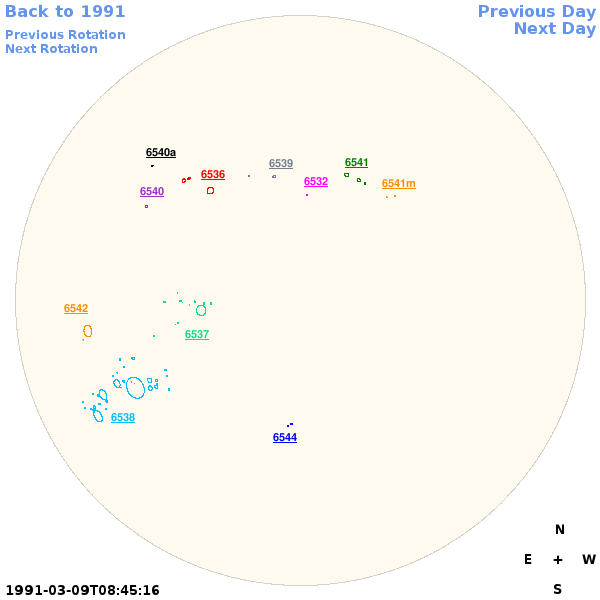

In [281]:
sun_image = Image.open(filepath)
sun_image

In [282]:
pixelMap = sun_image.load()

In [283]:
# Левый верхний угол.

for i in range(0, 130):
    for j in range(0, 70):
        pixelMap[i,j] = (255, 255, 255)

# Правый верхний угол.

for i in range(470, 600):
    for j in range(0, 70):
        pixelMap[i,j] = (255, 255, 255)
        
# Левый нижний угол.
        
for i in range(0, 160):
    for j in range(580, 600):
        pixelMap[i,j] = (255, 255, 255)
        
# Правый нижний угол.      

for i in range(510, 600):
    for j in range(510, 600):
        pixelMap[i,j] = (255, 255, 255)
        

# Сделать телесный цвет белым.

for i in range(0, 600):
    for j in range(0, 600):
        if pixelMap[i, j] == (255, 250, 240):
            pixelMap[i,j] = (255, 255, 255)
            

# Сделать круг Солнца цвет белым.

for i in range(0, 600):
    for j in range(0, 600):
        if pixelMap[i, j] == (215, 210, 200):
            pixelMap[i,j] = (255, 255, 255)

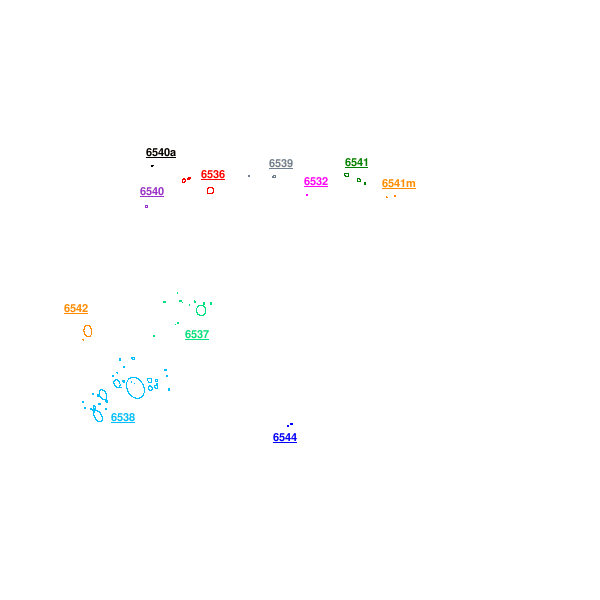

In [284]:
sun_image

In [287]:
def fromPILToCV2(img):
    cv_img = np.array(sun_image)
    return cv_img[:, :, ::-1].copy()

In [288]:
open_cv_sun_image = fromPILToCV2(sun_image)

In [289]:
open_cv_sun_image=cv2.cvtColor(open_cv_sun_image,cv2.COLOR_BGR2GRAY)
se=cv2.getStructuringElement(cv2.MORPH_RECT , (8,8))
bg=cv2.morphologyEx(open_cv_sun_image, cv2.MORPH_DILATE, se)
out_gray=cv2.divide(open_cv_sun_image, bg, scale=255)
out_binary=cv2.threshold(out_gray, 0, 255, cv2.THRESH_OTSU )[1] 

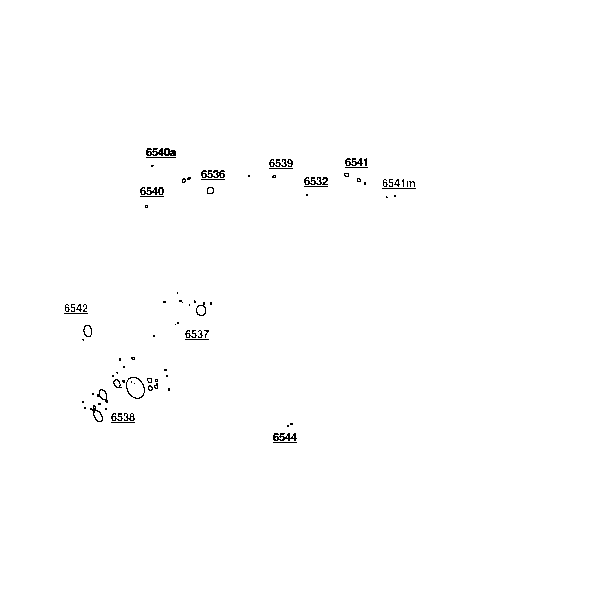

In [290]:
Image.fromarray(out_binary)

In [291]:
open_cv_sun_image = np.array(sun_image)
open_cv_sun_image = open_cv_sun_image[:, :, ::-1].copy()
out_binary = np.array(out_binary)

lines_under_numbers = []

for i in range(out_binary.shape[0]):
    j = 0
    while j < out_binary.shape[1]:
        if out_binary[i, j] == 0:
            values_in_line = out_binary[i][j:j + MIN_NUM_OF_PIXELS_IN_LINE]
            if len(np.unique(values_in_line)) == 1:
                x_left, y_left = i, j
                while out_binary[i, j] == 0 and j < out_binary.shape[1]:
                    out_binary[i + 1, j] = 255
                    j += 1
                y_right = j
                lines_under_numbers += [[y_left, x_left, y_right, x_left]]
                open_cv_sun_image = cv2.line(open_cv_sun_image, (y_left, x_left), (y_right, x_left), (0, 255, 0), 1)
        j += 1


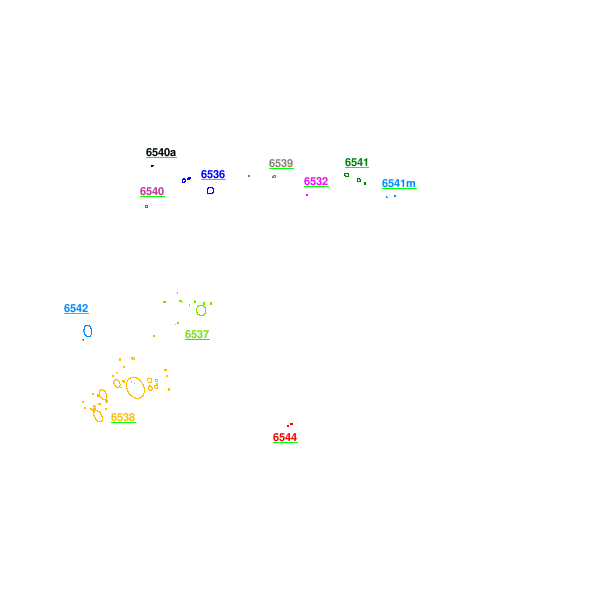

In [292]:
sun_image = Image.fromarray(open_cv_sun_image)
sun_image

In [293]:
numbers_height = 11
img1 = ImageDraw.Draw(sun_image)
for y_left, x_left, y_right, x_left in lines_under_numbers:
    img1.rectangle([(y_left, x_left - numbers_height), (y_right, x_left)], fill = '#FFFFFF', outline ="white") 

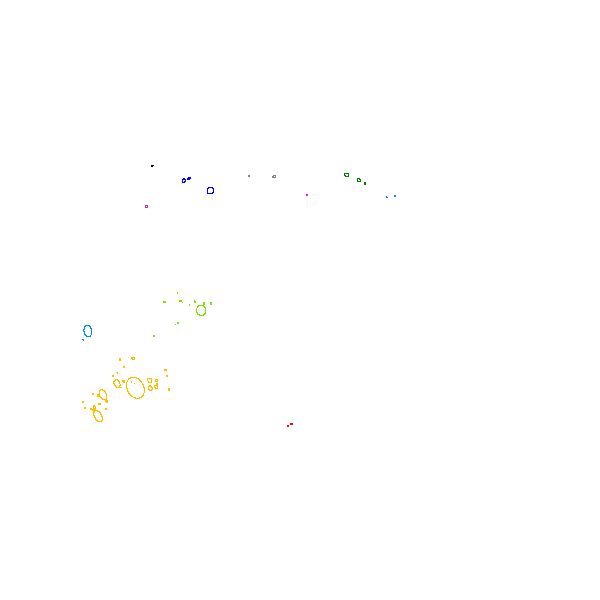

In [294]:
sun_image

In [295]:
from collections import defaultdict
by_color = defaultdict(int)
for pixel in sun_image.getdata():
    by_color[pixel] += 1
by_color

defaultdict(int,
            {(255, 255, 255): 359406,
             (0, 0, 0): 5,
             (0, 128, 0): 32,
             (144, 128, 112): 14,
             (0, 0, 255): 48,
             (255, 0, 255): 4,
             (0, 140, 255): 47,
             (204, 50, 153): 8,
             (127, 225, 0): 80,
             (255, 191, 0): 346,
             (255, 0, 0): 10})